In [4]:
from iohblade.loggers import ExperimentLogger
from iohblade import plot_convergence, plot_experiment_CEG
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json


logger = ExperimentLogger('results/kerneltuner-o4', True)


In [5]:
methods, problems = logger.get_methods_problems()
print(methods)
print(problems)

['o4-mini']
['kerneltuner-gemm', 'kerneltuner-convolution', 'kerneltuner-dedispersion', 'kerneltuner-hotspot']


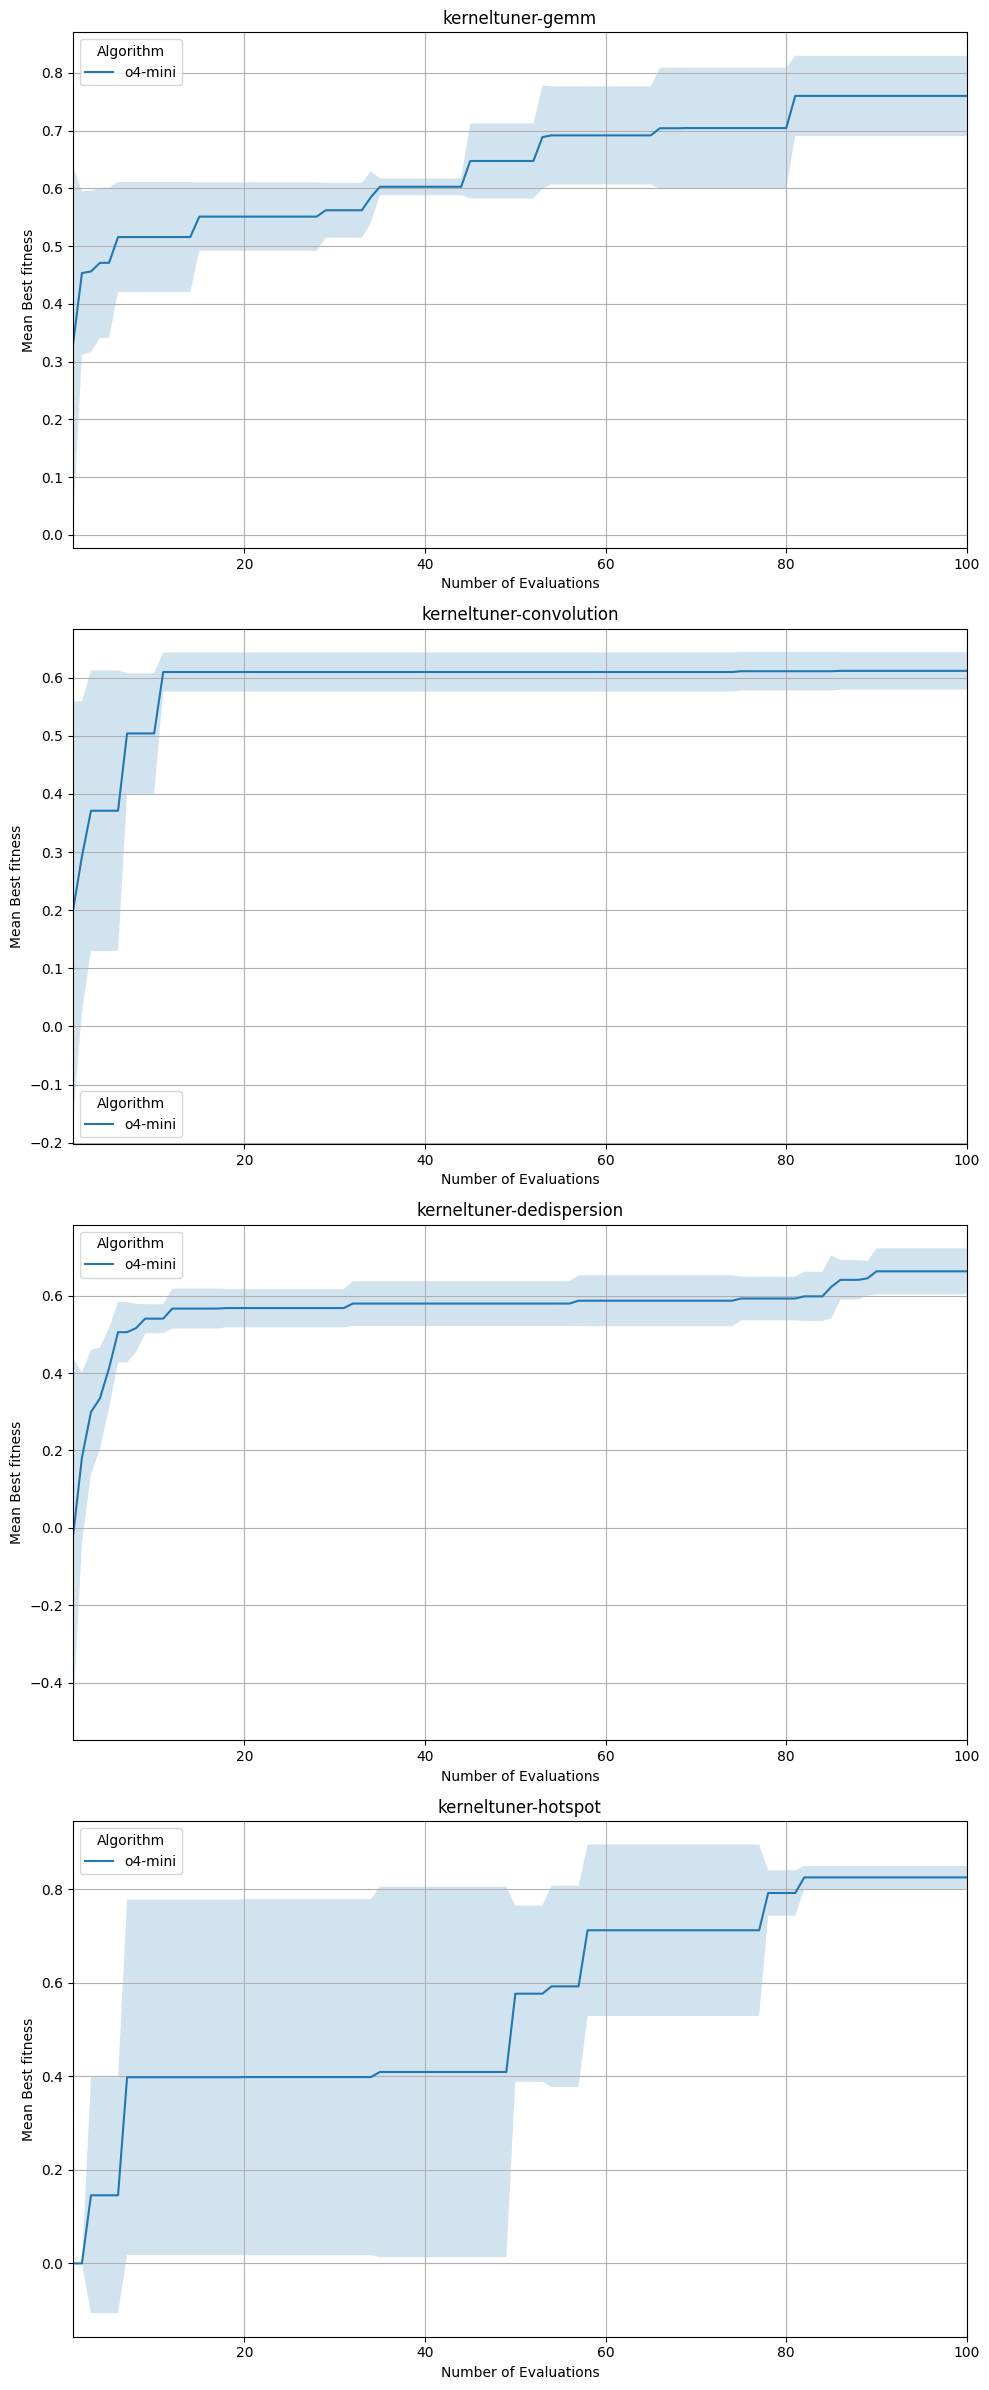

kerneltuner-gemm 265 AdaptiveBanditVNS
kerneltuner-convolution 110 MABAdaptiveVNS
kerneltuner-dedispersion 189 AnnealedHarmonySearch
kerneltuner-hotspot 281 MemeticConstraintGA


In [8]:

plot_convergence(logger, metric="fitness", save=False, budget=100)

for problem in problems:
    data = logger.get_problem_data(problem_name=problem)
    idx = data['fitness'].idxmax()
    print(problem, idx, data.iloc[idx]['name'])
    with open(f'results/kerneltuner-o4/alg-{problem}.py', 'w', encoding='utf-8') as f:
        f.write(data.iloc[idx]['code'])

